# Titanic Plotting
- Load data generated previously from 'titanic_filtered.csv'
* plot histogram of ages of people
-  plot no of people in each pclass on bar chart
- plot a horizontal bar-chart depicting the ratio of males to females
- plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead.
- plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
- plot stacked bar of survived with different pclass in same bar.
- plot box plot of ages of survived vs not-survived -->
- plot scatter plot of ages vs survived.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\jaipal\Desktop\dsc_weekday_2020_09_24\Assignments\jagadish\titanic_filtered.csv", index_col=0)
df.head()
                 

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.34,S
1,1,1,male,0.9167,1,2,151.55,S
2,1,0,female,2.0000,1,2,151.55,S
3,1,0,male,30.0000,1,2,151.55,S
4,1,0,female,25.0000,1,2,151.55,S


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1307 non-null   int64  
 1   survived  1307 non-null   int64  
 2   gender    1307 non-null   object 
 3   age       1307 non-null   float64
 4   sibsp     1307 non-null   int64  
 5   parch     1307 non-null   int64  
 6   fare      1307 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 91.9+ KB


In [16]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,2.296863,0.381025,29.850348,0.499617,0.385616,33.224794
std,0.836942,0.485825,12.860391,1.042273,0.866092,51.746187
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.900000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.450000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.280000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.330000


In [7]:
df.age.value_counts()

29.881135    263
24.000000     47
22.000000     43
21.000000     41
30.000000     40
            ... 
67.000000      1
66.000000      1
76.000000      1
0.333300       1
0.666700       1
Name: age, Length: 99, dtype: int64

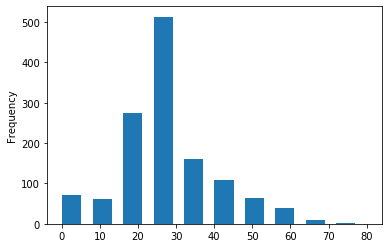

In [11]:
df.age.plot(kind = "hist", width =5)

(array([ 72.,  62., 274., 513., 160., 108.,  65.,  40.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <a list of 10 Patch objects>)

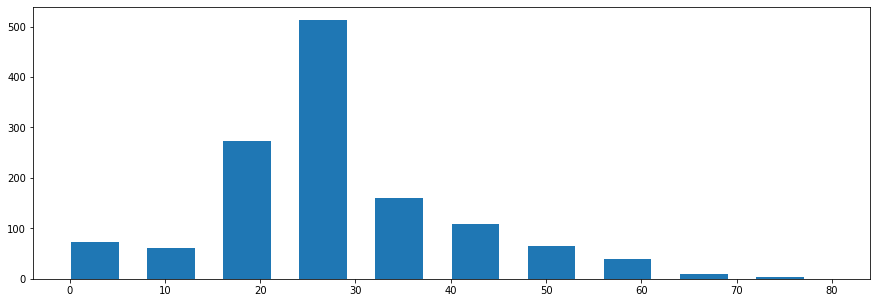

In [14]:
plt.figure(figsize=(15,5))
plt.hist(df.age, width = 5)

In [27]:
# plot no of people in each pclass on bar chart
grp=df.groupby(by =(['gender','pclass']))
r = grp.size()
r

gender  pclass
female  1         142
        2         106
        3         216
male    1         179
        2         171
        3         493
dtype: int64

In [32]:
r1 = r.unstack()
r1

pclass,1,2,3
gender,,,
female,142,106,216
male,179,171,493


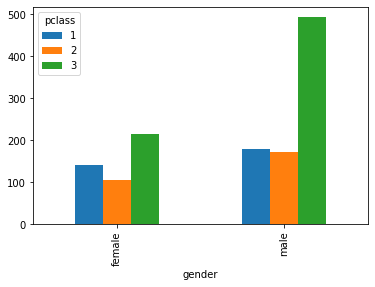

In [33]:
r1.plot(kind = 'bar')

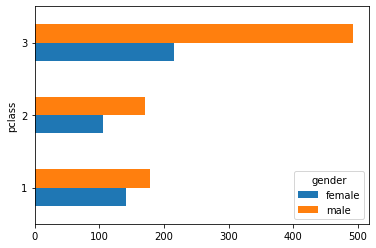

In [44]:
r.unstack('gender').plot(kind = 'barh') # foe understanding

In [46]:
# plot a horizontal bar-chart depicting the ratio of males to females

grp1 = df.groupby('gender')
r2= grp1.size()
r2


gender
female    464
male      843
dtype: int64

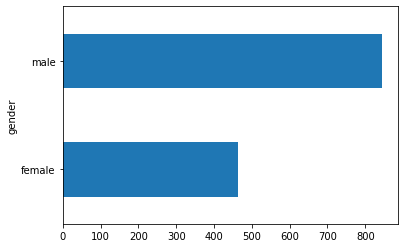

In [48]:
r2.plot(kind = 'barh')

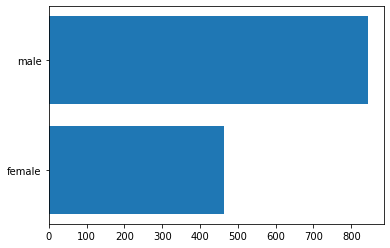

In [51]:
plt.barh(r2.index,r2.values)
plt.show()

In [54]:
# plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead.

grp2 = df.groupby(['gender', 'survived'])
r3 = grp2.size()
r3

gender  survived
female  0           127
        1           337
male    0           682
        1           161
dtype: int64

In [59]:
r4 = r3.unstack(level = 'gender')
r4

gender,female,male
survived,,
0,127,682
1,337,161


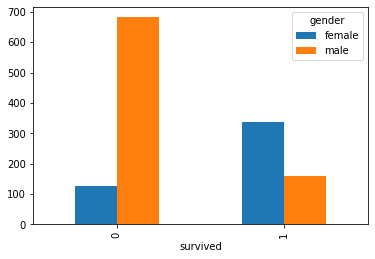

In [60]:
r4.plot(kind = 'bar')

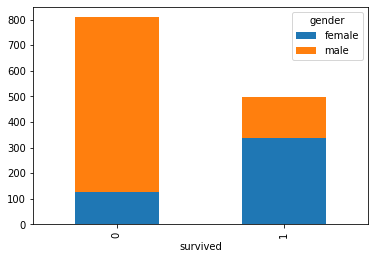

In [64]:
# plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
r4.plot(kind = 'bar', stacked = True)

<BarContainer object of 2 artists>

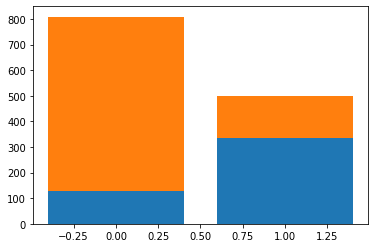

In [71]:
plt.bar(r4.index,r4.female.values)
plt.bar(r4.index,r4.male.values, bottom = r4.female.values)

In [72]:
# plot stacked bar of survived with different pclass in same bar
grp5 = df.groupby(['pclass','survived'])
r5= grp5.size()
r5

pclass  survived
1       0           123
        1           198
2       0           158
        1           119
3       0           528
        1           181
dtype: int64

In [77]:
r6 = r5.unstack(level = 'pclass')
r6

pclass,1,2,3
survived,,,
0,123,158,528
1,198,119,181


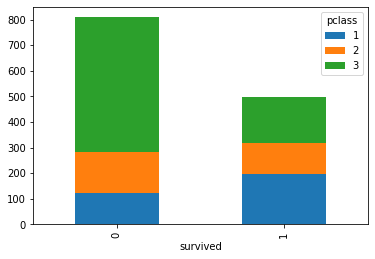

In [78]:
r6.plot(kind = 'bar', stacked = True)

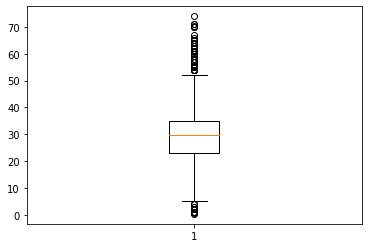

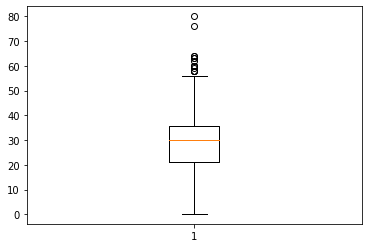

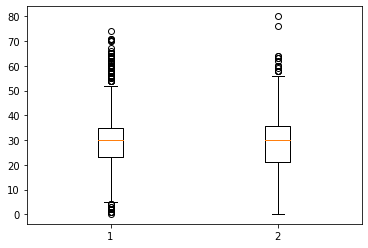

In [79]:
# plot box plot of ages of survived vs not-survived
df1 = df[df.survived == 0]
df2 = df[df.survived == 1]
plt.boxplot(df1.age)
plt.show()
plt.boxplot(df2.age)
plt.show()
plt.boxplot([df1.age,df2.age])
plt.show()

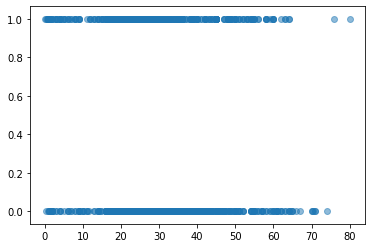

In [80]:
# plot scatter plot of ages vs survived.
s= df.groupby('survived')
plt.scatter(df.age,df.survived, alpha = 0.5)